#FDR for Number Types

Original P-values: [0.01 0.04 0.03 0.2  0.05 0.07 0.03 0.01 0.15 0.03]
Corrected P-values: [0.05       0.06666667 0.06       0.2        0.07142857 0.0875
 0.06       0.05       0.16666667 0.06      ]
Rejected hypotheses: [ True False False False False False False  True False False]


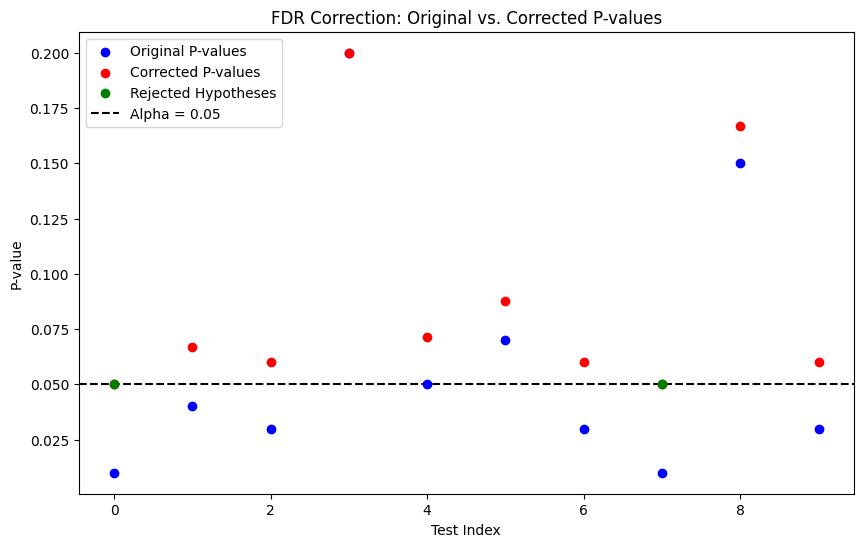

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example: Array of p-values from multiple hypothesis tests
p_values = np.array([0.01, 0.04, 0.03, 0.2, 0.05, 0.07, 0.03, 0.01, 0.15, 0.03])

# FDR correction using Benjamini-Hochberg procedure
fdr_results = sm.stats.multipletests(p_values, alpha=0.05, method='fdr_bh')

# Extract the corrected p-values and whether the null hypothesis was rejected
corrected_p_values = fdr_results[1]
rejected_hypotheses = fdr_results[0]

# Print the results
print("Original P-values:", p_values)
print("Corrected P-values:", corrected_p_values)
print("Rejected hypotheses:", rejected_hypotheses)

# Visualization: Plot the original and corrected p-values
plt.figure(figsize=(10, 6))

# Scatter plot of original p-values
plt.scatter(np.arange(len(p_values)), p_values, color='blue', label='Original P-values', zorder=5)

# Scatter plot of corrected p-values
plt.scatter(np.arange(len(p_values)), corrected_p_values, color='red', label='Corrected P-values', zorder=5)

# Mark the rejected hypotheses
plt.scatter(np.where(rejected_hypotheses)[0], corrected_p_values[rejected_hypotheses], color='green', label='Rejected Hypotheses', zorder=10)

# Line for the significance threshold (alpha = 0.05)
plt.axhline(y=0.05, color='black', linestyle='--', label="Alpha = 0.05")

# Labels and title
plt.xlabel('Test Index')
plt.ylabel('P-value')
plt.title('FDR Correction: Original vs. Corrected P-values')
plt.legend()

# Show the plot
plt.show()


#FDR for Image comparing

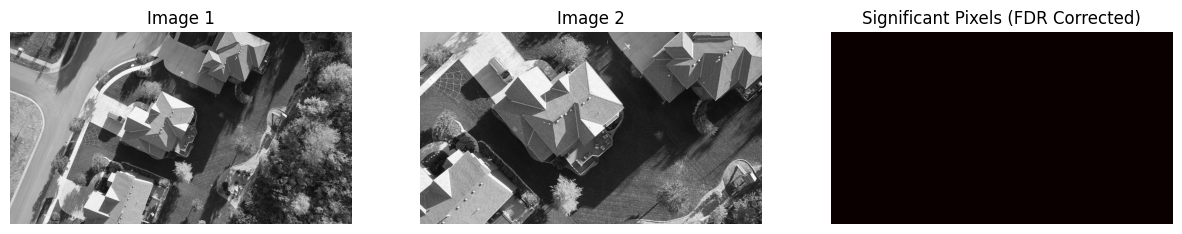

Number of significant pixels after FDR correction: 0


In [1]:
import numpy as np
import cv2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

# Load two images
image1 = cv2.imread('/content/aerial.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/aerial2.jpg', cv2.IMREAD_GRAYSCALE)

# Resize images to ensure they are the same size
if image1.shape != image2.shape:
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Get the shape of the images
height, width = image1.shape

# Compute the pixel-wise difference between the two images
difference = image1.astype(np.float32) - image2.astype(np.float32)

# Now compute the p-values from the differences (assume normal distribution for simplicity)
# Since we're comparing two images, let's use a simple approach where we assume each pixel's difference follows a normal distribution.
# For simplicity, assume the standard deviation of the differences is constant across pixels.

# Compute the p-values for the pixel differences based on normal distribution
# This is a simplification; in real cases, you would need the actual distribution of differences for a better result.
mean_diff = np.mean(difference)
std_diff = np.std(difference)

# Calculate the z-score for each pixel (pixel difference / std_dev)
z_scores = (difference - mean_diff) / std_diff

# Now compute the two-tailed p-value from the z-scores (using the normal distribution)
p_values = 2 * (1 - stats.norm.cdf(np.abs(z_scores)))

# Flatten the p-values for FDR correction
p_values_flat = p_values.ravel()

# Apply FDR correction using the Benjamini-Hochberg procedure
fdr_results = sm.stats.multipletests(p_values_flat, alpha=0.05, method='fdr_bh')

# Extract corrected p-values and rejected hypotheses
corrected_p_values_flat = fdr_results[1]
rejected_hypotheses_flat = fdr_results[0]

# Reshape the corrected p-values and rejected hypotheses to the shape of the images
corrected_p_values_image = corrected_p_values_flat.reshape(image1.shape)
rejected_hypotheses_image = rejected_hypotheses_flat.reshape(image1.shape)

# Visualize the results
plt.figure(figsize=(15, 8))

# Display the original images
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title("Image 1")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title("Image 2")
plt.axis('off')

# Display the rejected hypothesis image (significant pixels after FDR correction)
plt.subplot(1, 3, 3)
plt.imshow(rejected_hypotheses_image, cmap='hot')
plt.title("Significant Pixels (FDR Corrected)")
plt.axis('off')

plt.show()

# Optionally, print the number of rejected hypotheses (significant pixels)
num_significant_pixels = np.sum(rejected_hypotheses_image)
print(f"Number of significant pixels after FDR correction: {num_significant_pixels}")
